# TOPAS-nBio Analysis Toolkit for IRTGValue Output

This notebook demonstrates how to use the chemistry_output_manager.py functions to analyze IRTGValue output from TOPAS-nBio simulations.

In [4]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import our custom modules
from chemistry_output_manager import *

## 1. Single Run Analysis

Analyze a single run of IRTGValue output.

,GValue_final
Molecule,
H2O2^0,1.36
H3O^1,3.64
H^0,1.13
H_2^0,1.03
OH^-1,1.00
OH^0,3.10
e_aq^-1,2.76


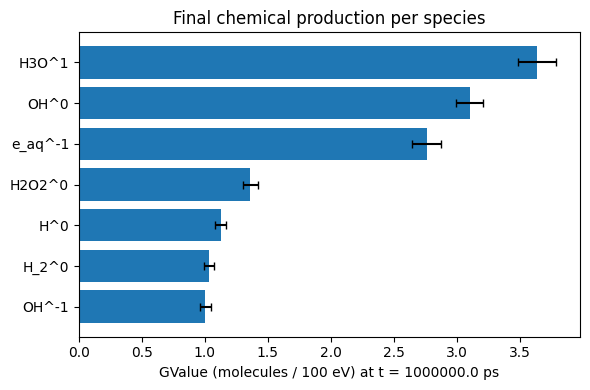

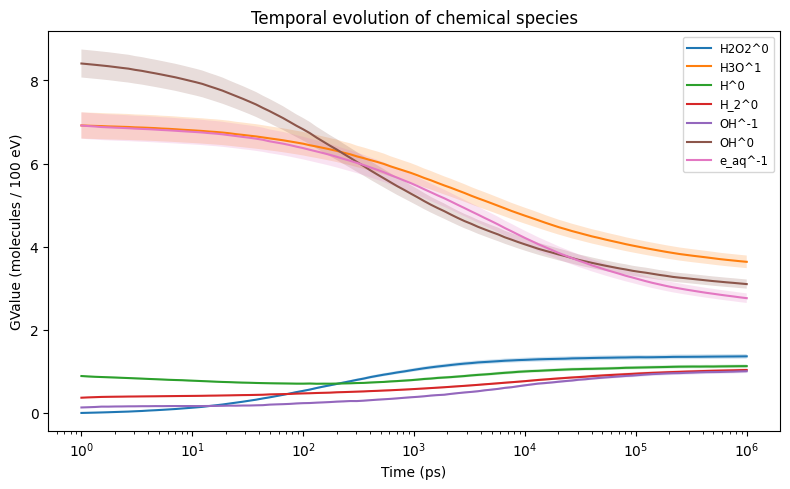

✔  Summary and time-evolution CSVs saved.


In [2]:
# Define file paths
root = pathlib.Path('../TOPAS_CellsNPs/work/topas-med0-smallcell0-var0/run1')
filebase = root / 'IRTGValue'

# Load and process data
df = read_irtgvalue_phase_space(filebase)
df = filter_inactive_species(df)

# Create pivot tables for time series analysis
pivot, pivot_err = create_pivots(df)

# Get summary of final values
summary, summary_err, last_time = get_final_values(pivot, pivot_err)

# Display interactive summary table
display(summary.style.format('{:.2f}'))

# Plot final values
plot_final_values(summary, summary_err, last_time)

# Plot time evolution
plot_time_evolution(pivot, pivot_err)

# Save results to files
save_results(summary, pivot, root)

## 2. Enhancement Analysis (Comparing with/without Nanoparticles)

Compare two simulations to calculate enhancement factors.

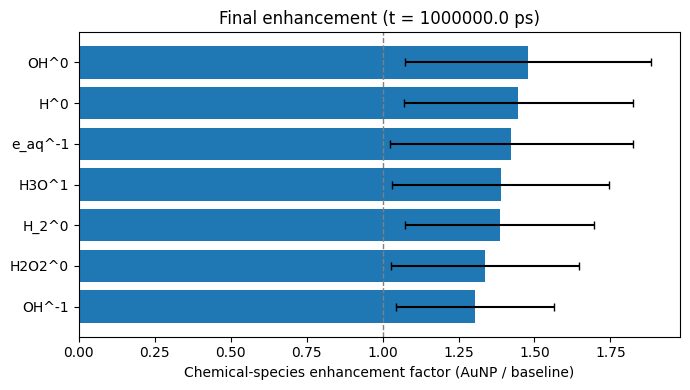

✔  CSV "../TOPAS_CellsNPs/work/topas-med1-smallcell1-var0/run1/Enhancement_final_with_errors.csv" written.


In [3]:
# Define file paths
root_base = pathlib.Path('../TOPAS_CellsNPs/work/topas-med0-smallcell0-var0/run1')
root_np = pathlib.Path('../TOPAS_CellsNPs/work/topas-med1-smallcell1-var0/run1')

filebase_base = root_base / 'IRTGValue'
filebase_np = root_np / 'IRTGValue'

# Calculate enhancement factors
ratio, ratio_err, t_final = calculate_enhancement(filebase_base, filebase_np)

# Plot enhancement factors
plot_enhancement(ratio, ratio_err, t_final)

# Save enhancement results
output_path = root_np / 'Enhancement_final_with_errors.csv'
save_enhancement(ratio, ratio_err, output_path)

## 3. Multi-Run Analysis (Combining Results from Multiple Simulations)

Aggregate data from multiple simulation runs to get more statistically robust results.

✔  Aggregated files written to ../TOPAS_CellsNPs/work/TestCellColony/cell3/results


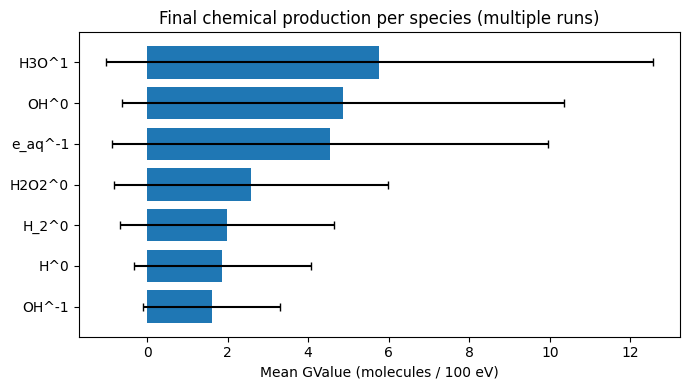

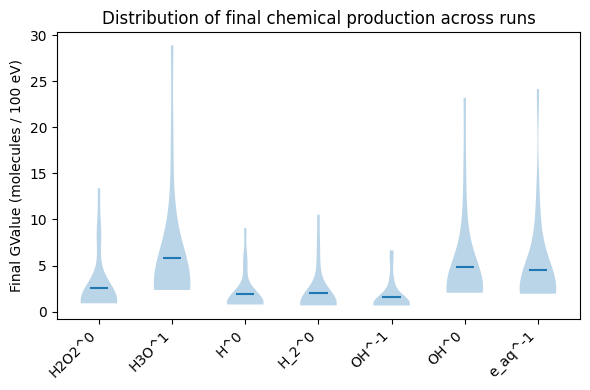

In [5]:
# Define parameters for multi-run analysis
base_dir = pathlib.Path('../TOPAS_CellsNPs/work/TestCellColony/cell3')
run_template = 'run{}'
n_runs = 20

# Process all runs and get aggregated data
df_all, pivot_mean, pivot_sd, summary_df, pivot_final, out_dir = merge_multi_run_irtgvalue(
    base_dir, run_template, n_runs
)

# Plot summary of aggregated results
summary_mean = summary_df['Mean_GValue']
summary_sd = summary_df['SD_GValue']
plot_multi_run_summary(summary_mean, summary_sd)

# Plot violin plot showing distribution across runs
plot_multi_run_violin(pivot_final)

## 4. Custom Analysis Example

Demonstrate how to use the core functions for custom analysis needs.

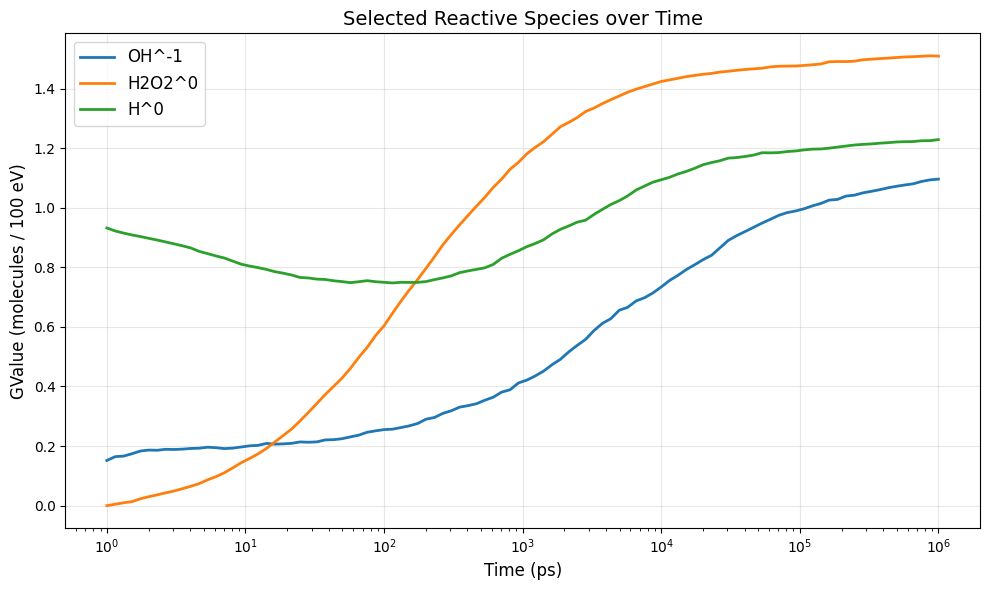

In [6]:
# Example of a more specific analysis using the building blocks
# For instance, comparing multiple species across time

# Load data from a specific run
specific_run = pathlib.Path('../TOPAS_CellsNPs/work/topas-med1-smallcell1-var0/run10')
specific_filebase = specific_run / 'IRTGValue'
df_specific = read_irtgvalue_phase_space(specific_filebase)
df_specific = filter_inactive_species(df_specific)

# Create pivot for time series
pivot_specific, _ = create_pivots(df_specific)

# Plot only selected species of interest
species_of_interest = ['OH^-1', 'H2O2^0', 'e_aq⁻1', 'H^0']
available_species = [s for s in species_of_interest if s in pivot_specific.columns]

plt.figure(figsize=(10, 6))
for species in available_species:
    plt.plot(pivot_specific.index, pivot_specific[species], label=species, linewidth=2)

plt.xscale('log')
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('GValue (molecules / 100 eV)', fontsize=12)
plt.title('Selected Reactive Species over Time', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()